In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Define the CNN model with 2 convolutional and max pooling layers
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch Normalization for the first conv layer

        # Second convolutional block
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch Normalization for the second conv layer

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc = nn.Linear(32 * 8 * 8, 2)  # Adjusted for the CIFAR-10 input size (32x32)

    def forward(self, x):
        # First convolutional block: Conv -> BN -> ReLU -> Pool
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        # Second convolutional block: Conv -> BN -> ReLU -> Pool
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten the tensor for the fully connected layer
        x = x.view(x.size(0), -1)

        # Fully connected layer
        x = self.fc(x)
        return x  # No softmax as CrossEntropyLoss includes it


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Loss: 0.9133, Accuracy: 0.5520, Val Loss: 0.6759, Val Accuracy: 0.5300
Epoch [2/30], Loss: 0.8221, Accuracy: 0.5560, Val Loss: 0.6784, Val Accuracy: 0.5800
Epoch [3/30], Loss: 0.7459, Accuracy: 0.5880, Val Loss: 0.6820, Val Accuracy: 0.5550
Epoch [4/30], Loss: 0.7116, Accuracy: 0.6030, Val Loss: 0.6816, Val Accuracy: 0.5700
Epoch [5/30], Loss: 0.6929, Accuracy: 0.6080, Val Loss: 0.6709, Val Accuracy: 0.5850
Epoch [6/30], Loss: 0.6788, Accuracy: 0.6150, Val Loss: 0.6729, Val Accuracy: 0.5900
Epoch [7/30], Loss: 0.6642, Accuracy: 0.6280, Val Loss: 0.6618, Val Accuracy: 0.6050
Epoch [8/30], Loss: 0.6564, Accuracy: 0.6480, Val Loss: 0.6503, Val Accuracy: 0.6200
Epoch [9/30], Loss: 0.6459, Accuracy: 0.6430, Val Loss: 0.6504, Val Accuracy: 0.6150
Epoch [10/30], Loss: 0.6307, Accuracy: 0.6630, Val Loss: 0.6434, Val Accuracy: 0.6250
Epoch [11/30], Loss: 0.6228, Accuracy: 0.6710, Val Loss: 0.6443, Val Accu

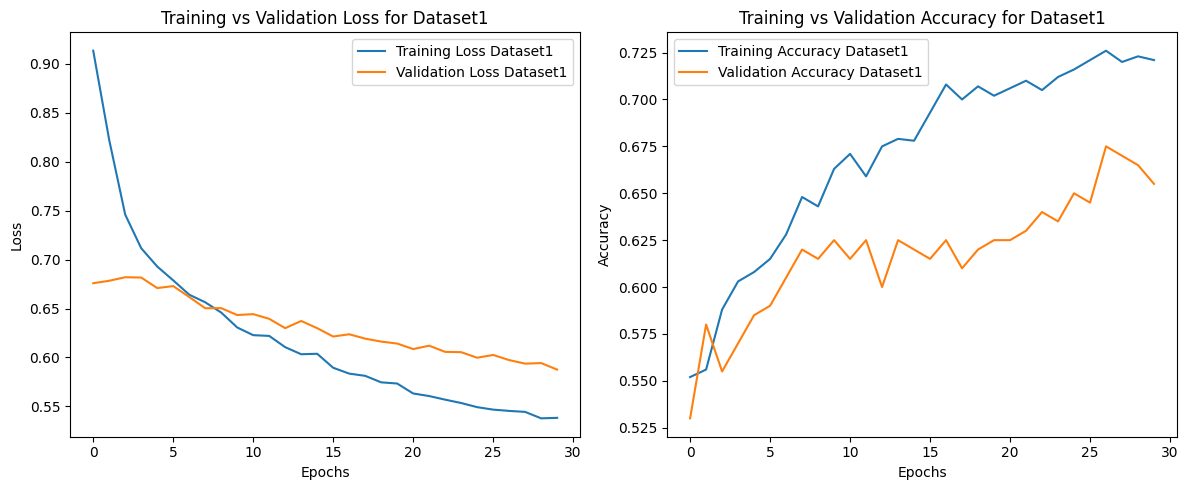

Model weights saved as model_weights_dataset1.pth
Training complete for Dataset1!


In [ ]:
import random
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import Counter

# Transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Filter and remap classes to [0, 1]
# Filter and remap classes to [0, 1]
def filter_and_remap(dataset, target_classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in target_classes]
    images = [dataset[i][0] for i in indices]  # List of images
    labels = [target_classes.index(dataset[i][1]) for i in indices]  # Remap labels
    return list(zip(images, labels))

# Dataset loading
train_dataset1 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataset1 = filter_and_remap(train_dataset1, [2, 3])  # Bird (2) and Cat (3)

# Randomly sample 1000 images from the training data
num_train_samples = min(1000, len(train_dataset1))  # Ensure enough samples exist
train_indices1 = random.sample(range(len(train_dataset1)), num_train_samples)
train_subset1 = torch.utils.data.Subset(train_dataset1, train_indices1)
train_loader1 = DataLoader(train_subset1, batch_size=64, shuffle=True)

# Preparing the test dataset
test_dataset1 = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataset1 = filter_and_remap(test_dataset1, [2, 3])  # Bird (2) and Cat (3)

# Randomly sample 200 images from the testing data
num_test_samples = min(200, len(test_dataset1))  # Ensure enough samples exist
test_indices1 = random.sample(range(len(test_dataset1)), num_test_samples)
test_subset1 = torch.utils.data.Subset(test_dataset1, test_indices1)
test_loader1 = DataLoader(test_subset1, batch_size=64, shuffle=False)

# Model definition (assuming SimpleCNN is already defined)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=1e-4, momentum=0.9)

# Custom weight initialization
def initialize_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model1.apply(initialize_weights)

# Training loop for Dataset1
losses1, accuracies1, val_losses1, val_accuracies1 = [], [], [], []
num_epochs = 30

for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    num_correct = 0

    for images, labels in train_loader1:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model1(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        num_correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(train_loader1)
    losses1.append(average_loss)
    accuracy = num_correct / len(train_loader1.dataset)
    accuracies1.append(accuracy)

    # Validation step
    model1.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_correct = 0

        for images, labels in test_loader1:
            images, labels = images.to(device), labels.to(device)
            outputs = model1(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()

        average_val_loss = val_loss / len(test_loader1)
        val_losses1.append(average_val_loss)
        val_accuracy = val_correct / len(test_loader1.dataset)
        val_accuracies1.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}, '
          f'Val Loss: {average_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Test accuracy after all epochs
model1.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader1:
        images, labels = images.to(device), labels.to(device)
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / len(test_loader1.dataset)
print(f'Test Accuracy after all epochs: {test_accuracy:.4f}')

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(losses1, label='Training Loss Dataset1')
plt.plot(val_losses1, label='Validation Loss Dataset1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for Dataset1')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies1, label='Training Accuracy Dataset1')
plt.plot(val_accuracies1, label='Validation Accuracy Dataset1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Dataset1')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model weights
torch.save(model1.state_dict(), 'model_weights_dataset1.pth')
print('Model weights saved as model_weights_dataset1.pth')

print('Training complete for Dataset1!')


Files already downloaded and verified
Files already downloaded and verified
Class distribution in training data: Counter({0: 503, 1: 497})
Class distribution in test data: Counter({0: 111, 1: 89})
Epoch [1/30], Loss: 0.8908, Accuracy: 0.5020, Val Loss: 0.6710, Val Accuracy: 0.5750
Epoch [2/30], Loss: 0.7476, Accuracy: 0.5650, Val Loss: 0.6330, Val Accuracy: 0.6350
Epoch [3/30], Loss: 0.6520, Accuracy: 0.6410, Val Loss: 0.5845, Val Accuracy: 0.7050
Epoch [4/30], Loss: 0.5948, Accuracy: 0.6850, Val Loss: 0.5515, Val Accuracy: 0.7250
Epoch [5/30], Loss: 0.5493, Accuracy: 0.7270, Val Loss: 0.5223, Val Accuracy: 0.7450
Epoch [6/30], Loss: 0.5208, Accuracy: 0.7470, Val Loss: 0.4918, Val Accuracy: 0.7550
Epoch [7/30], Loss: 0.4953, Accuracy: 0.7610, Val Loss: 0.4563, Val Accuracy: 0.7800
Epoch [8/30], Loss: 0.4808, Accuracy: 0.7700, Val Loss: 0.4414, Val Accuracy: 0.7900
Epoch [9/30], Loss: 0.4593, Accuracy: 0.7850, Val Loss: 0.4257, Val Accuracy: 0.8000
Epoch [10/30], Loss: 0.4502, Accuracy:

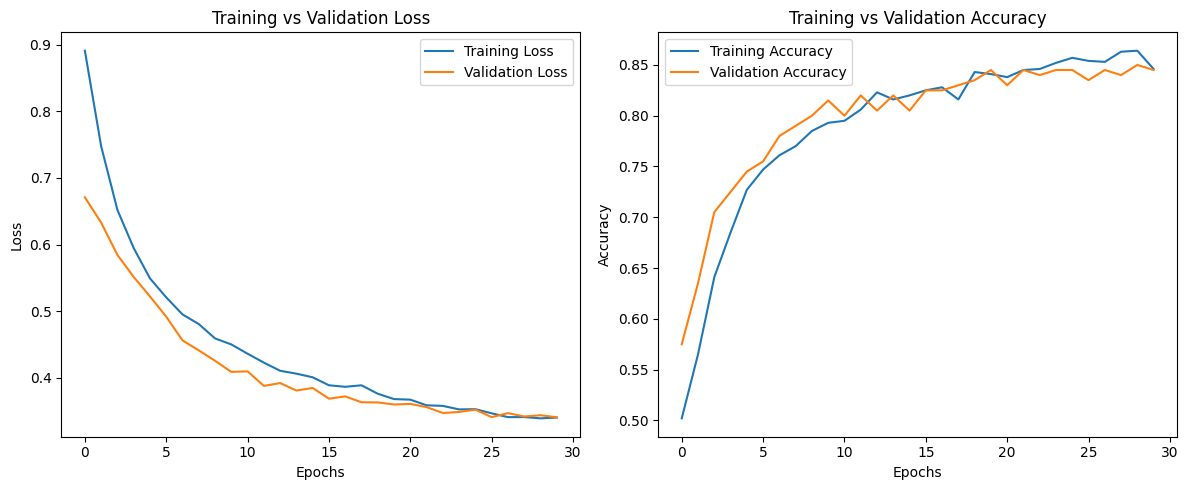

Model weights saved as model_weights_dataset2.pth
Training complete for Dataset2!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import random

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset2_full = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset2_full = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter data for classes Bird (2) and Cat (3), and remap labels
# Function to filter and remap classes
def filter_and_remap(dataset, target_classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in target_classes]
    images = [dataset[i][0] for i in indices]  # List of images
    labels = [target_classes.index(dataset[i][1]) for i in indices]  # Remap to 0 (Bird), 1 (Cat)
    return list(zip(images, labels))

# Remap Bird (4) -> 0 and Cat (5) -> 1
train_dataset2 = filter_and_remap(train_dataset2_full, [8, 9])  # Training dataset filtered for Bird and Cat
test_dataset2 = filter_and_remap(test_dataset2_full, [8, 9])    # Testing dataset filtered for Bird and Cat

# Randomly sample 1000 training images and 200 testing images
num_train_samples = min(1000, len(train_dataset2))  # Ensure enough training samples
num_test_samples = min(200, len(test_dataset2))     # Ensure enough testing samples

train_indices = random.sample(range(len(train_dataset2)), num_train_samples)
test_indices = random.sample(range(len(test_dataset2)), num_test_samples)

# Create subsets based on sampled indices
train_dataset2 = torch.utils.data.Subset(train_dataset2, train_indices)
test_dataset2 = torch.utils.data.Subset(test_dataset2, test_indices)

# Create DataLoaders
train_loader2 = DataLoader(train_dataset2, batch_size=64, shuffle=True)
test_loader2 = DataLoader(test_dataset2, batch_size=64, shuffle=False)

# Print class distribution in the datasets
train_labels = [label for _, label in train_dataset2]
print("Class distribution in training data:", Counter(train_labels))

test_labels = [label for _, label in test_dataset2]
print("Class distribution in test data:", Counter(test_labels))

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = SimpleCNN().to(device)  # Assuming SimpleCNN is already defined elsewhere
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=1e-4, momentum=0.9)
model2.apply(initialize_weights)
# Training loop for Dataset2
num_epochs = 30
losses2, accuracies2, val_losses2, val_accuracies2 = [], [], [], []

for epoch in range(num_epochs):
    model2.train()
    running_loss, num_correct = 0.0, 0

    for images, labels in train_loader2:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        num_correct += (predicted == labels).sum().item()

    # Calculate and store training loss and accuracy
    avg_loss = running_loss / len(train_loader2)
    train_accuracy = num_correct / len(train_loader2.dataset)
    losses2.append(avg_loss)
    accuracies2.append(train_accuracy)

    # Validation step
    model2.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for images, labels in test_loader2:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()

    # Calculate and store validation loss and accuracy
    avg_val_loss = val_loss / len(test_loader2)
    val_accuracy = val_correct / len(test_loader2.dataset)
    val_losses2.append(avg_val_loss)
    val_accuracies2.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.4f}, '
          f'Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Calculate final test accuracy
model2.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader2:
        images, labels = images.to(device), labels.to(device)
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / len(test_loader2.dataset)
print(f'Test Accuracy after all epochs: {test_accuracy:.4f}')

# Plot training and validation metrics
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(losses2, label='Training Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies2, label='Training Accuracy')
plt.plot(val_accuracies2, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model weights
torch.save(model2.state_dict(), 'model_weights_dataset2.pth')
print('Model weights saved as model_weights_dataset2.pth')
print('Training complete for Dataset2!')


<ipython-input-62-e81a57870373>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model3.load_state_dict(torch.load('model_weights_dataset1.pth', map_location=device))


Epoch [1/30], Loss: 0.7262, Accuracy: 0.5880, Val Loss: 0.7251, Val Accuracy: 0.5750
Epoch [2/30], Loss: 0.6625, Accuracy: 0.6340, Val Loss: 0.6655, Val Accuracy: 0.6450
Epoch [3/30], Loss: 0.6225, Accuracy: 0.6710, Val Loss: 0.6199, Val Accuracy: 0.6650
Epoch [4/30], Loss: 0.5808, Accuracy: 0.7000, Val Loss: 0.6032, Val Accuracy: 0.6800
Epoch [5/30], Loss: 0.5573, Accuracy: 0.7120, Val Loss: 0.5886, Val Accuracy: 0.6750
Epoch [6/30], Loss: 0.5436, Accuracy: 0.7180, Val Loss: 0.5732, Val Accuracy: 0.6800
Epoch [7/30], Loss: 0.5340, Accuracy: 0.7190, Val Loss: 0.5693, Val Accuracy: 0.6800
Epoch [8/30], Loss: 0.5254, Accuracy: 0.7370, Val Loss: 0.5532, Val Accuracy: 0.6850
Epoch [9/30], Loss: 0.5212, Accuracy: 0.7370, Val Loss: 0.5562, Val Accuracy: 0.6800
Epoch [10/30], Loss: 0.5055, Accuracy: 0.7470, Val Loss: 0.5395, Val Accuracy: 0.6900
Epoch [11/30], Loss: 0.4927, Accuracy: 0.7570, Val Loss: 0.5369, Val Accuracy: 0.7000
Epoch [12/30], Loss: 0.4907, Accuracy: 0.7560, Val Loss: 0.5332

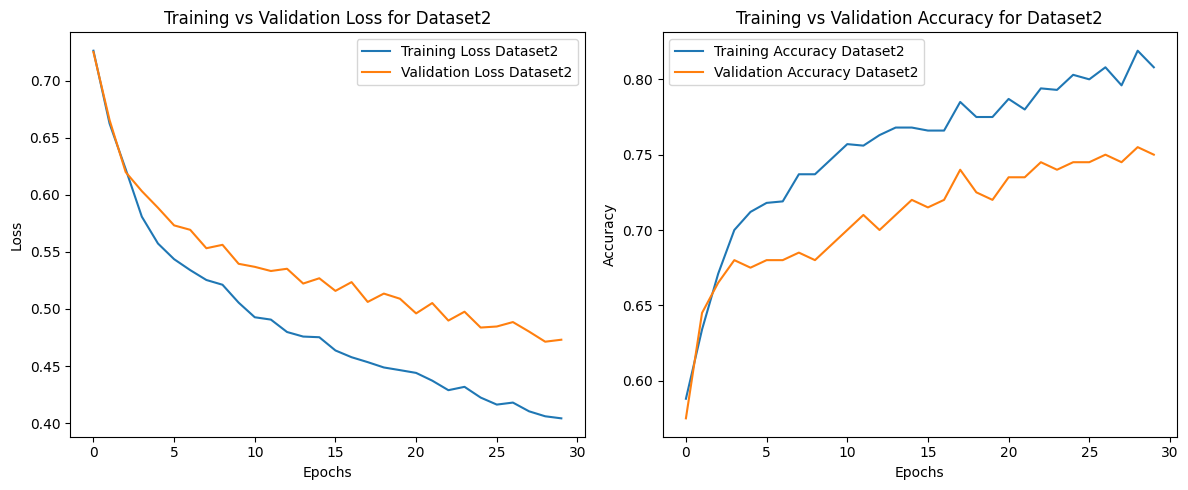

Transfer learning complete for Dataset2!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Assume SimpleCNN is defined somewhere in your code.

# Load Dataset2 (Bird and Cat)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Initialize model2 and load model1 weights
model3 = SimpleCNN().to(device)

# Load model1 weights (use weights_only=True to avoid warnings)
model3.load_state_dict(torch.load('model_weights_dataset1.pth', map_location=device))



criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=1e-4, momentum=0.9)

# Fine-tuning the model
losses3 = []
accuracies3 = []
val_losses3 = []
val_accuracies3 = []
num_epochs = 30

for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    num_correct = 0

    for images, labels in train_loader2:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model3(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        num_correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(train_loader2)
    losses3.append(average_loss)
    accuracy = num_correct / len(train_loader2.dataset)
    accuracies3.append(accuracy)

    # Validation step
    model3.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_correct = 0

        for images, labels in test_loader2:
            images, labels = images.to(device), labels.to(device)
            outputs = model3(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()

        average_val_loss = val_loss / len(test_loader2)
        val_losses3.append(average_val_loss)
        val_accuracy = val_correct / len(test_loader2.dataset)
        val_accuracies3.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}, '
          f'Val Loss: {average_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Calculate and print test accuracy after all epochs
model3.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader2:
        images, labels = images.to(device), labels.to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / len(test_loader2.dataset)
print(f'Test Accuracy after all epochs: {test_accuracy:.4f}')

# Plotting loss and accuracy for Dataset2
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(losses3, label='Training Loss Dataset2')
plt.plot(val_losses3, label='Validation Loss Dataset2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for Dataset2')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies3, label='Training Accuracy Dataset2')
plt.plot(val_accuracies3, label='Validation Accuracy Dataset2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Dataset2')
plt.legend()

plt.tight_layout()
plt.show()

print('Transfer learning complete for Dataset2!')


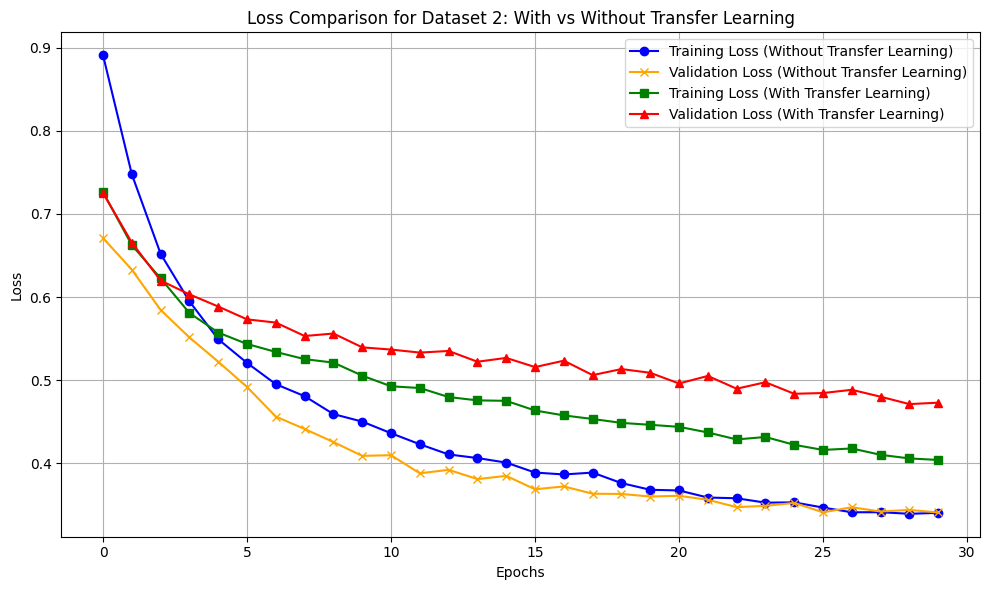

In [ ]:
import matplotlib.pyplot as plt

# Create a combined plot for loss comparison
plt.figure(figsize=(10, 6))

# Plot training and validation loss without transfer learning
plt.plot(losses2, label='Training Loss (Without Transfer Learning)', color='blue', marker='o')
plt.plot(val_losses2, label='Validation Loss (Without Transfer Learning)', color='orange', marker='x')

# Plot training and validation loss with transfer learning
plt.plot(losses3, label='Training Loss (With Transfer Learning)', color='green', marker='s')
plt.plot(val_losses3, label='Validation Loss (With Transfer Learning)', color='red', marker='^')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison for Dataset 2: With vs Without Transfer Learning')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-64-a404e7371601>:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pre_trained_weights = torch.load('model_weights_dataset1.pth', map_location=device)


Epoch [1/30], Loss: 0.6775, Accuracy: 0.5800, Val Loss: 0.6758, Val Accuracy: 0.6400
Epoch [2/30], Loss: 0.6039, Accuracy: 0.6910, Val Loss: 0.5995, Val Accuracy: 0.7150
Epoch [3/30], Loss: 0.5534, Accuracy: 0.7420, Val Loss: 0.5380, Val Accuracy: 0.7450
Epoch [4/30], Loss: 0.5244, Accuracy: 0.7570, Val Loss: 0.4809, Val Accuracy: 0.8000
Epoch [5/30], Loss: 0.4900, Accuracy: 0.7800, Val Loss: 0.4891, Val Accuracy: 0.7750
Epoch [6/30], Loss: 0.4718, Accuracy: 0.7910, Val Loss: 0.4542, Val Accuracy: 0.8150
Epoch [7/30], Loss: 0.4613, Accuracy: 0.8050, Val Loss: 0.4276, Val Accuracy: 0.8200
Epoch [8/30], Loss: 0.4464, Accuracy: 0.8120, Val Loss: 0.4396, Val Accuracy: 0.8200
Epoch [9/30], Loss: 0.4297, Accuracy: 0.8130, Val Loss: 0.4180, Val Accuracy: 0.8150
Epoch [10/30], Loss: 0.4181, Accuracy: 0.8130, Val Loss: 0.4147, Val Accuracy: 0.8150
Epoch [11/30], Loss: 0.4108, Accuracy: 0.8200, Val Loss: 0.3987, Val Accuracy: 0.8150
Epoch [12/30], Loss: 0.4016, Accuracy: 0.8280, Val Loss: 0.3864

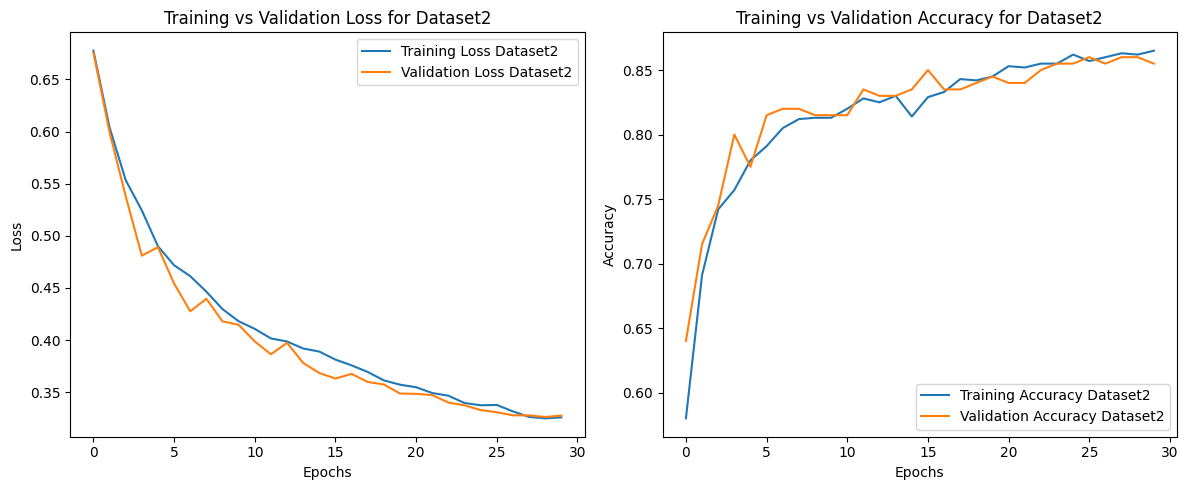

Transfer learning complete for Dataset2!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Conv3x3Efficient(nn.Module):
    def __init__(self, in_channels, out_channels, pre_trained_filters=None):
        super(Conv3x3Efficient, self).__init__()
        # Fine-tuned convolution
        self.conv_new = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)

        # Pre-trained filters: trainable parameter
        if pre_trained_filters is not None:
            self.pre_trained_filters = nn.Parameter(pre_trained_filters, requires_grad=True)
        else:
            # Default initialization for pre-trained filters
            self.pre_trained_filters = nn.Parameter(
                torch.randn(out_channels, in_channels, 3, 3) * 0.01,  # Xavier-like initialization
                requires_grad=True
            )

        # Modulation factors for dynamic weighting
        self.alpha = nn.Parameter(torch.ones(out_channels) * 0.5)  # Equal initial weighting
        self.beta = nn.Parameter(torch.ones(out_channels) * 0.5)

    def forward(self, x):
        # Apply pre-trained and fine-tuned filters
        pre_trained_output = F.conv2d(x, self.pre_trained_filters, padding=1)
        fine_tuned_output = self.conv_new(x)

        # Combine outputs dynamically
        combined_output = (
            self.alpha.view(1, -1, 1, 1) * pre_trained_output +
            self.beta.view(1, -1, 1, 1) * fine_tuned_output
        )
        return combined_output


# Define the CNN model with Conv3x3Efficient layers
class SimpleCNN(nn.Module):
    def __init__(self, pre_trained_filters=None):
        super(SimpleCNN, self).__init__()

        # First convolutional block using Conv3x3Efficient
        self.conv1 = Conv3x3Efficient(in_channels=3, out_channels=16, pre_trained_filters=pre_trained_filters)
        self.bn1 = nn.BatchNorm2d(16)

        # Second convolutional block using Conv3x3Efficient
        self.conv2 = Conv3x3Efficient(in_channels=16, out_channels=32)
        self.bn2 = nn.BatchNorm2d(32)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc = nn.Linear(32 * 8 * 8, 2)  # Adjusted for CIFAR-10 input size (32x32)

    def forward(self, x):
        # First convolutional block
        x = self.conv1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.pool(x)

        # Second convolutional block
        x = self.conv2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.pool(x)

        # Flatten and fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Dataset transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



# Load pre-trained filters from Dataset1
pre_trained_weights = torch.load('model_weights_dataset1.pth', map_location=device)
pre_trained_filters_conv1 = pre_trained_weights['conv1.weight']  # Assuming weights for conv1 are saved in the state dict

# Initialize the model with pre-trained filters
model3 = SimpleCNN(pre_trained_filters=pre_trained_filters_conv1).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=1e-4, momentum=0.9)
losses3 = []
accuracies3 = []
val_losses3 = []
val_accuracies3 = []
num_epochs = 30

for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    num_correct = 0

    for images, labels in train_loader2:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model3(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        num_correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(train_loader2)
    losses3.append(average_loss)
    accuracy = num_correct / len(train_loader2.dataset)
    accuracies3.append(accuracy)

    # Validation step
    model3.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_correct = 0

        for images, labels in test_loader2:
            images, labels = images.to(device), labels.to(device)
            outputs = model3(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()

        average_val_loss = val_loss / len(test_loader2)
        val_losses3.append(average_val_loss)
        val_accuracy = val_correct / len(test_loader2.dataset)
        val_accuracies3.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}, '
          f'Val Loss: {average_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Calculate and print test accuracy after all epochs
model3.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader2:
        images, labels = images.to(device), labels.to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / len(test_loader2.dataset)
print(f'Test Accuracy after all epochs: {test_accuracy:.4f}')

# Plotting loss and accuracy for Dataset2
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(losses3, label='Training Loss Dataset2')
plt.plot(val_losses3, label='Validation Loss Dataset2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for Dataset2')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies3, label='Training Accuracy Dataset2')
plt.plot(val_accuracies3, label='Validation Accuracy Dataset2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Dataset2')
plt.legend()

plt.tight_layout()
plt.show()

print('Transfer learning complete for Dataset2!')

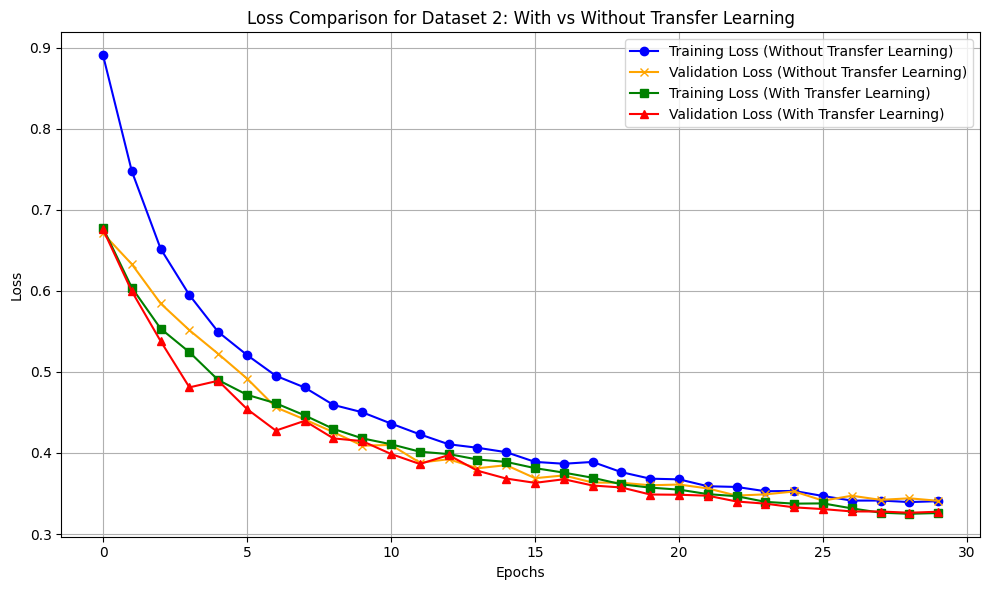

In [ ]:
import matplotlib.pyplot as plt

# Create a combined plot for loss comparison
plt.figure(figsize=(10, 6))

# Plot training and validation loss without transfer learning
plt.plot(losses2, label='Training Loss (Without Transfer Learning)', color='blue', marker='o')
plt.plot(val_losses2, label='Validation Loss (Without Transfer Learning)', color='orange', marker='x')

# Plot training and validation loss with transfer learning
plt.plot(losses3, label='Training Loss (With Transfer Learning)', color='green', marker='s')
plt.plot(val_losses3, label='Validation Loss (With Transfer Learning)', color='red', marker='^')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison for Dataset 2: With vs Without Transfer Learning')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()
